# Image Classification using Convolutional Neural Networks

### Author:
 David Higuera

### Objective:
The objective of this project is to develop a convolutional neural network (CNN) classification model using the CIFAR-10 dataset. The model will be trained to accurately classify images of various objects into one of the ten predefined classes.

### Introduction:
Image classification is a fundamental task in computer vision, with applications ranging from facial recognition to autonomous driving. The CIFAR-10 dataset is a widely used benchmark for image classification tasks, containing 60,000 32x32 color images in 10 classes. Each class represents a different type of object, such as airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

The dataset is divided into 50,000 training images and 10,000 testing images, with each class containing an equal number of images. This balance makes CIFAR-10 suitable for training and evaluating machine learning models.

In this project, a CNN model will be developed using TensorFlow and Keras to classify images from the CIFAR-10 dataset. The model will be trained on the training set and evaluated on the test set to measure its performance in terms of accuracy and other relevant metrics.

In [36]:
# Import required libraries
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import save_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#!pip install keras==2.12.0

In [3]:
#!pip install scikeras

## Part 1: Data Preprocessing

In [5]:
# Connect Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Go to the directory where the dataset is located
%cd "/content/drive/MyDrive/DL/Assignment_5"

/content/drive/MyDrive/DL/Assignment_5


In [7]:
# Uncompress the dataset files
!tar -xvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [8]:
# Load the batches.meta file
with open('cifar-10-batches-py/batches.meta', 'rb') as f:
    meta = pickle.load(f)

# Access the keys in the meta dictionary
label_names = meta['label_names']
num_cases_per_batch = meta['num_cases_per_batch']
num_vis = meta['num_vis']

print("Label names:", label_names)
print("Number of cases per batch:", num_cases_per_batch)
print("Number of dimensions per image:", num_vis)


Label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Number of cases per batch: 10000
Number of dimensions per image: 3072


In [9]:
def load_cifar10_batch(file_path):
    #Load a single batch of CIFAR-10 dataset.
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
    return batch

def load_cifar10_data(file_names):
    #Load CIFAR-10 dataset from multiple batches.
    data_batches = [load_cifar10_batch(f) for f in file_names]
    data = np.concatenate([batch[b'data'] for batch in data_batches], axis=0)
    labels = np.concatenate([batch[b'labels'] for batch in data_batches], axis=0)
    return data, labels

# File paths for CIFAR-10 dataset
data_batch_files = [
    'cifar-10-batches-py/data_batch_1',
    'cifar-10-batches-py/data_batch_2',
    'cifar-10-batches-py/data_batch_3',
    'cifar-10-batches-py/data_batch_4',
    'cifar-10-batches-py/data_batch_5'
]
test_batch_file = 'cifar-10-batches-py/test_batch'

In [10]:
# Load training and testing data
train_data, train_labels = load_cifar10_data(data_batch_files)
test_data, test_labels = load_cifar10_data([test_batch_file])

In [11]:
# Reshape the images from a flatten format (1D array) to a 3D array format and normalize the data
train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype(np.float32) / 255.0
test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype(np.float32) / 255.0

print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000,)


In [12]:
# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.1, # Randomly shift images vertically by up to 20% of the height
    shear_range=0.1,        # Apply random shear transformation
    zoom_range=0.1,         # Apply random zoom
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels after rotation or shift
)

# Specify the batch size for generating augmented images
batch_size = 32

# Generate augmented images from the training set
augmented_data_generator = datagen.flow(train_data, train_labels, batch_size=batch_size)

## Part 2: EDA

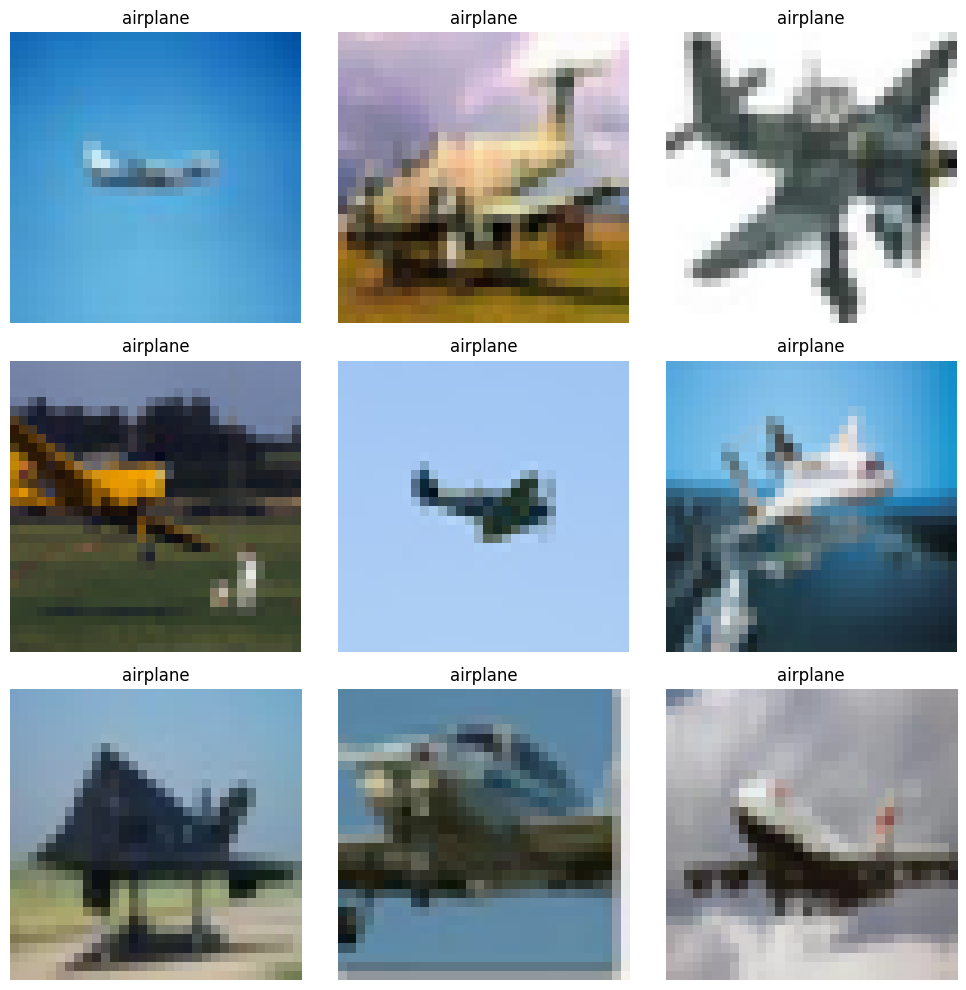

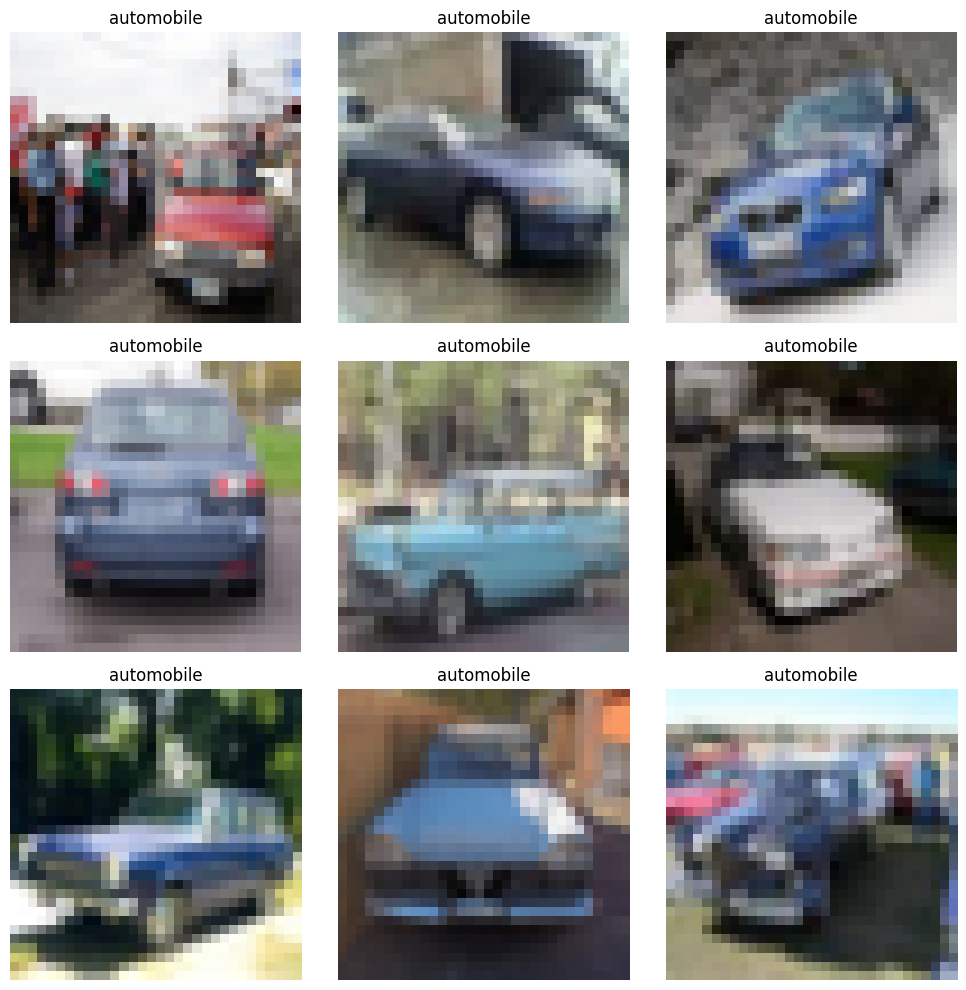

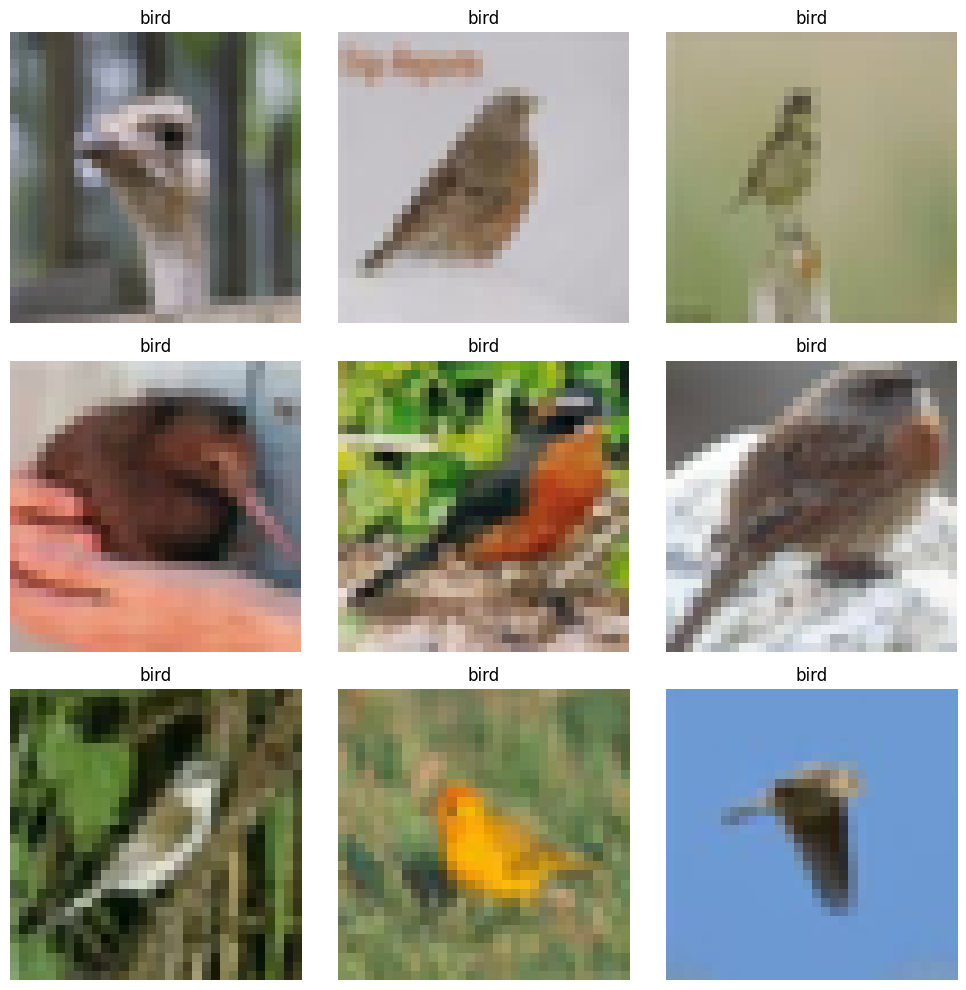

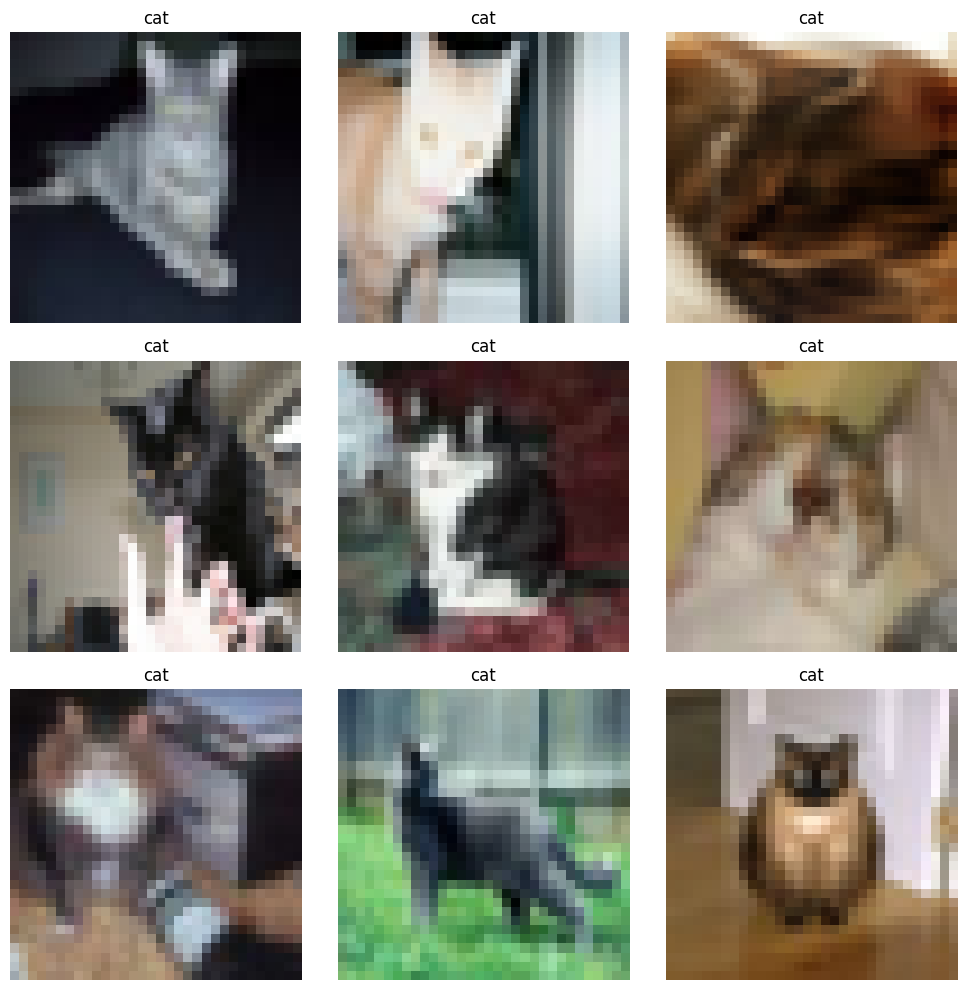

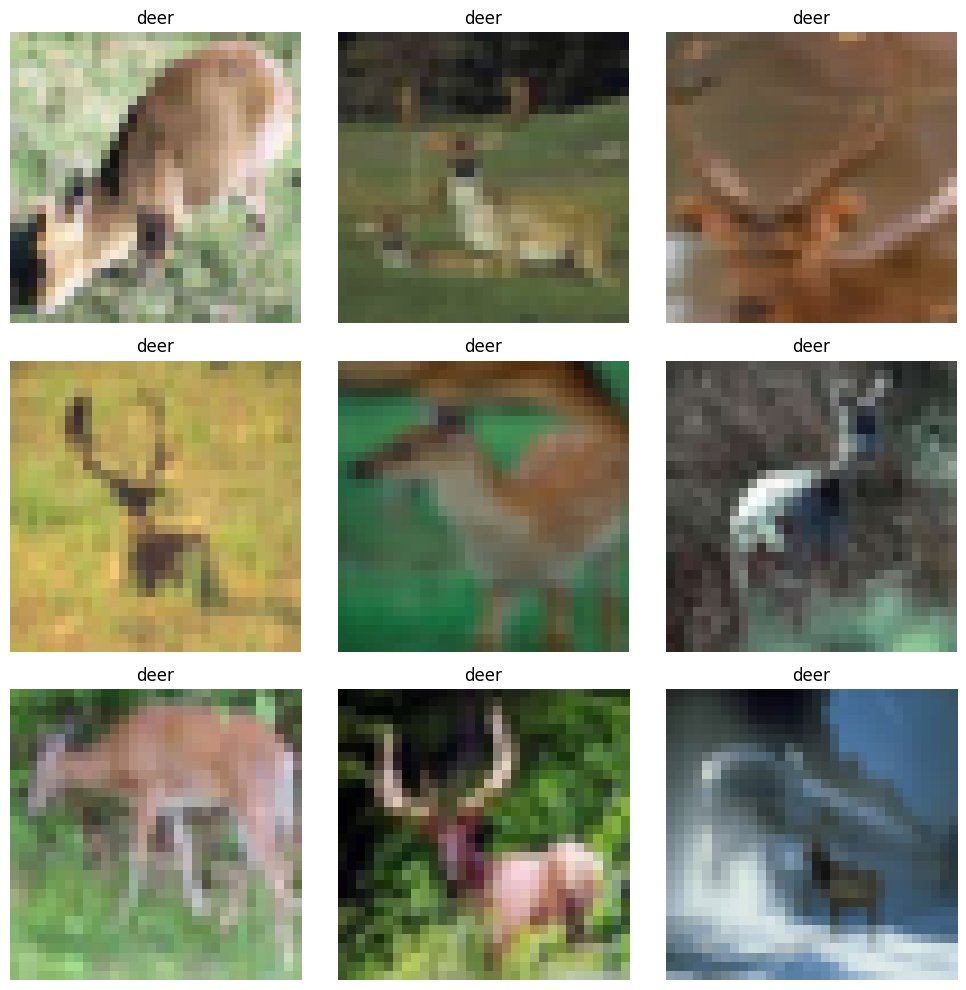

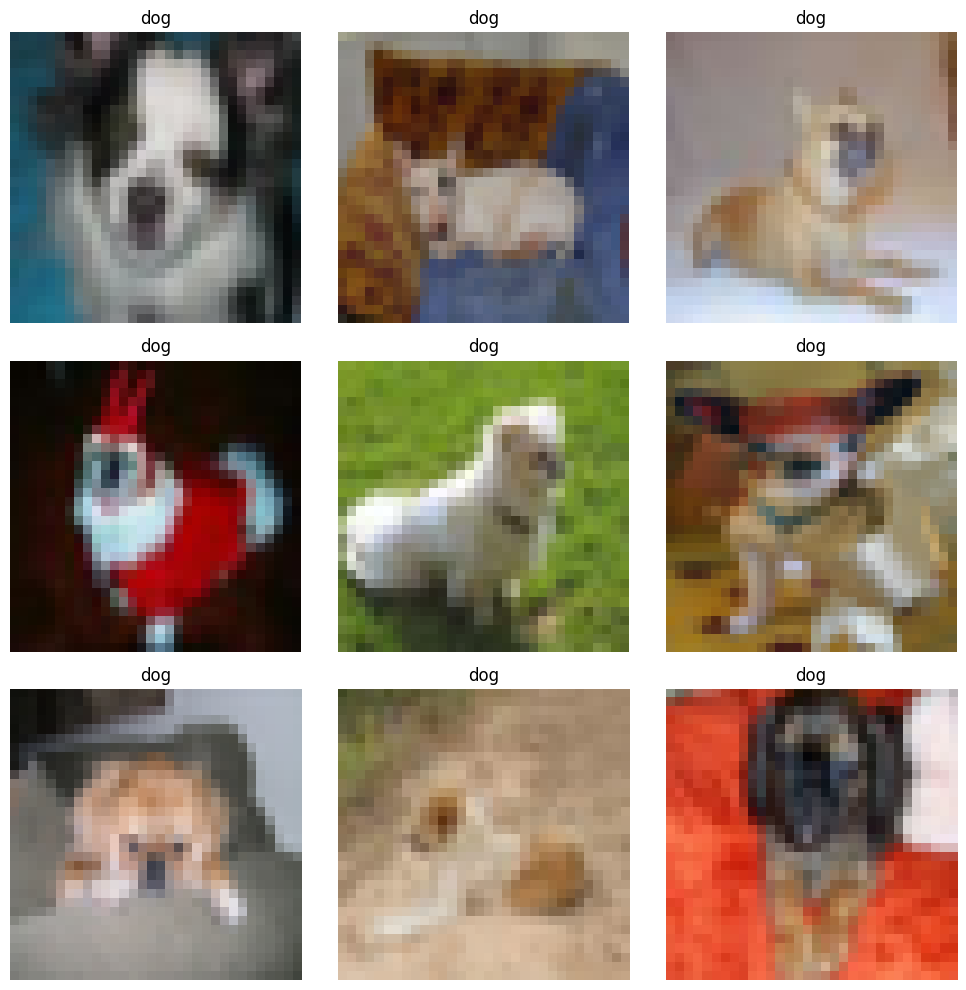

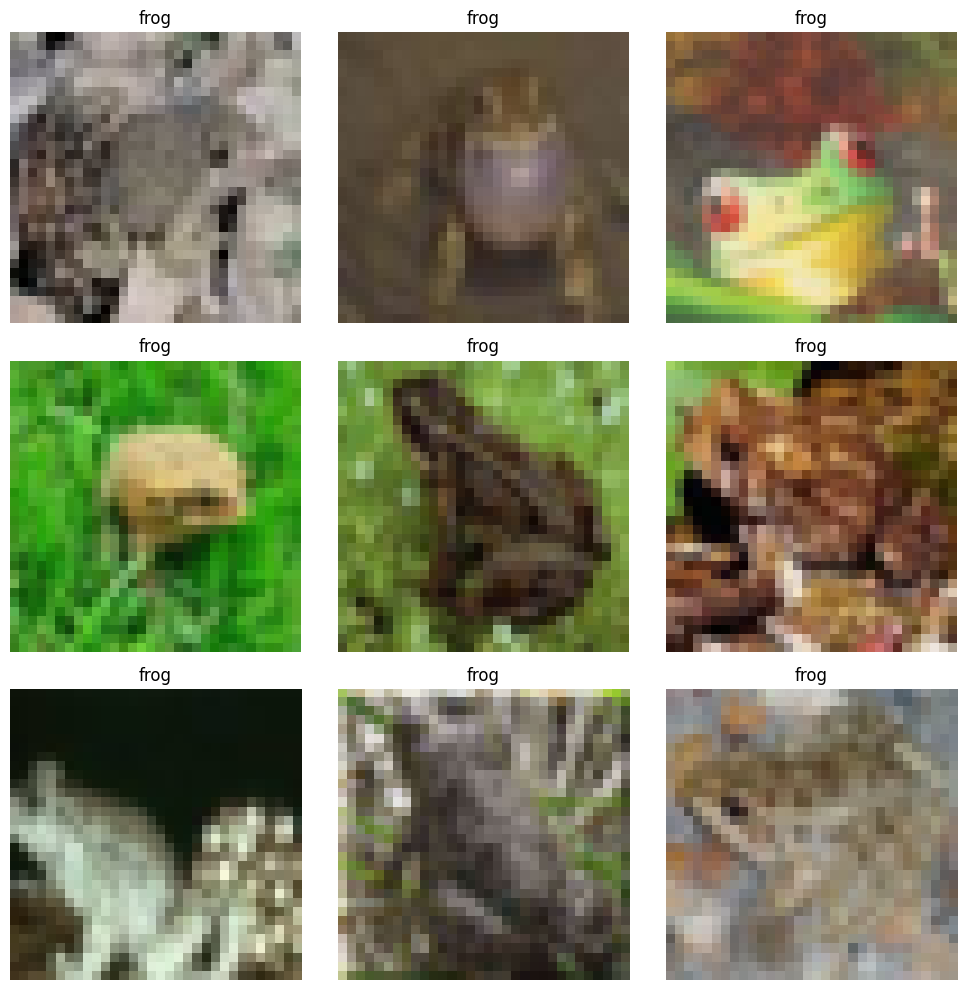

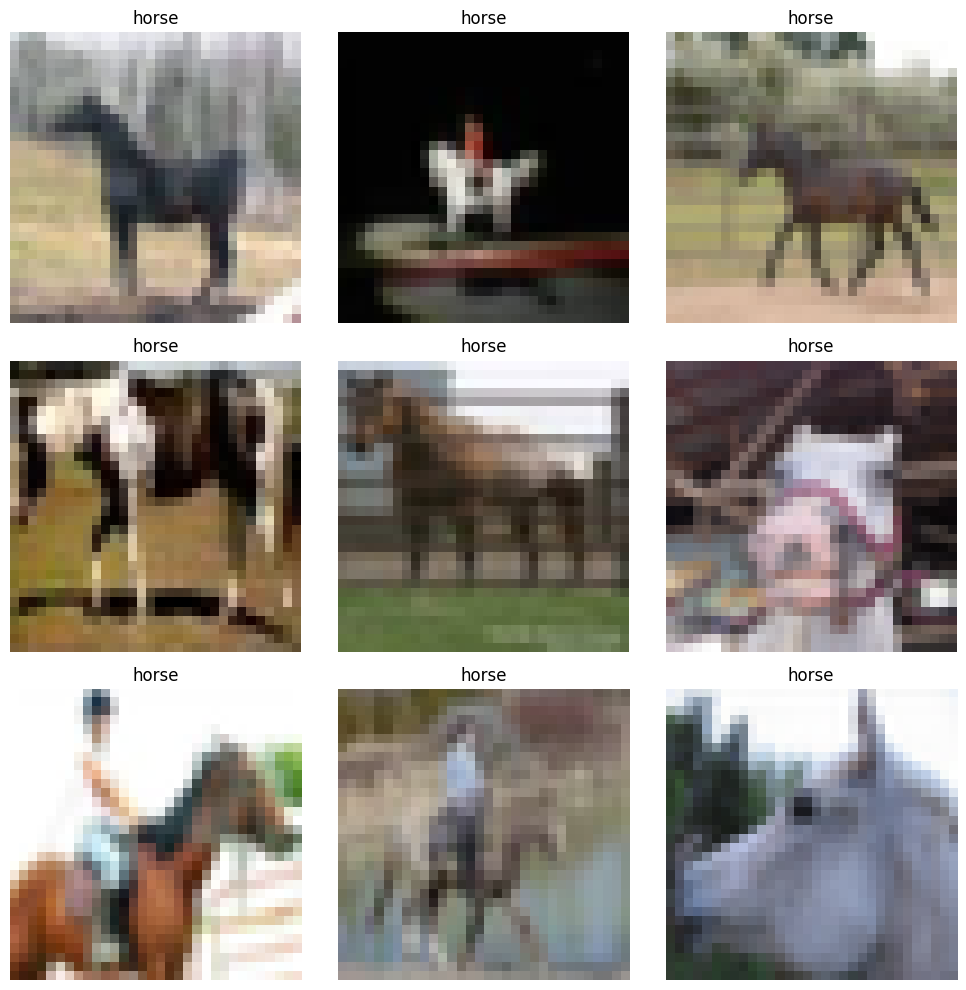

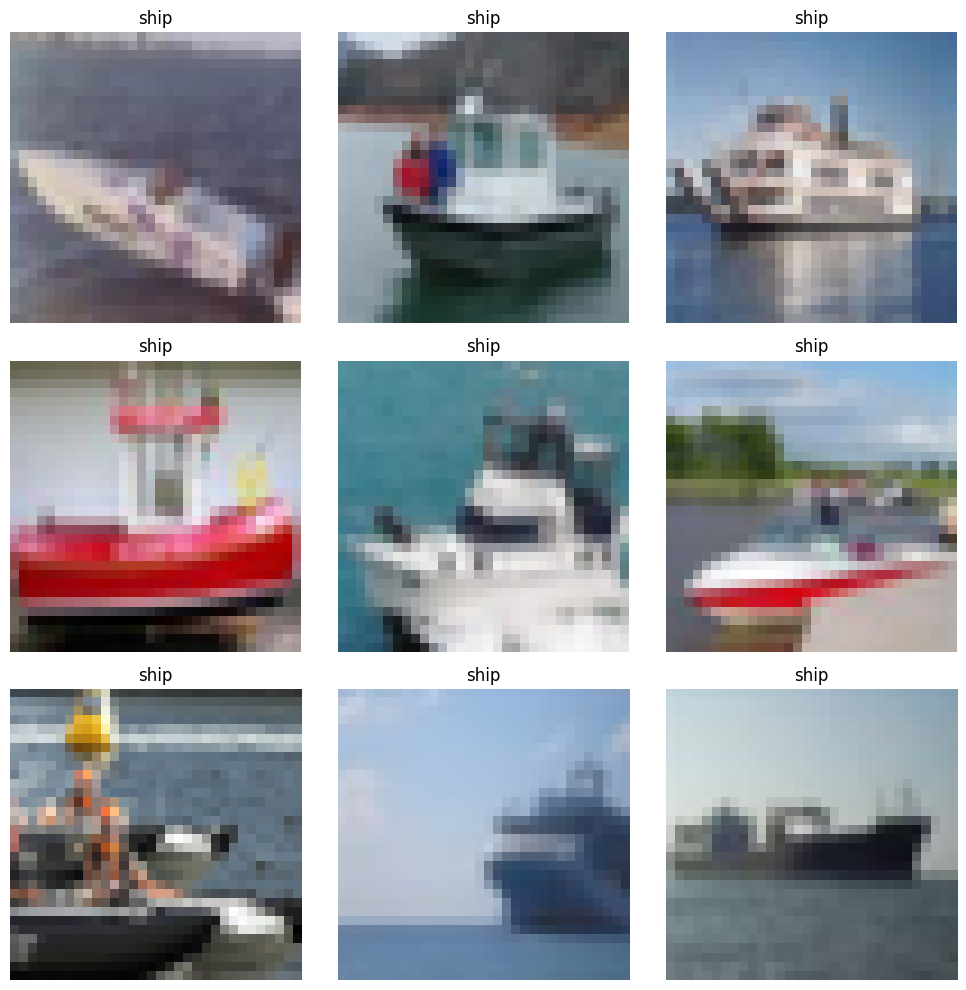

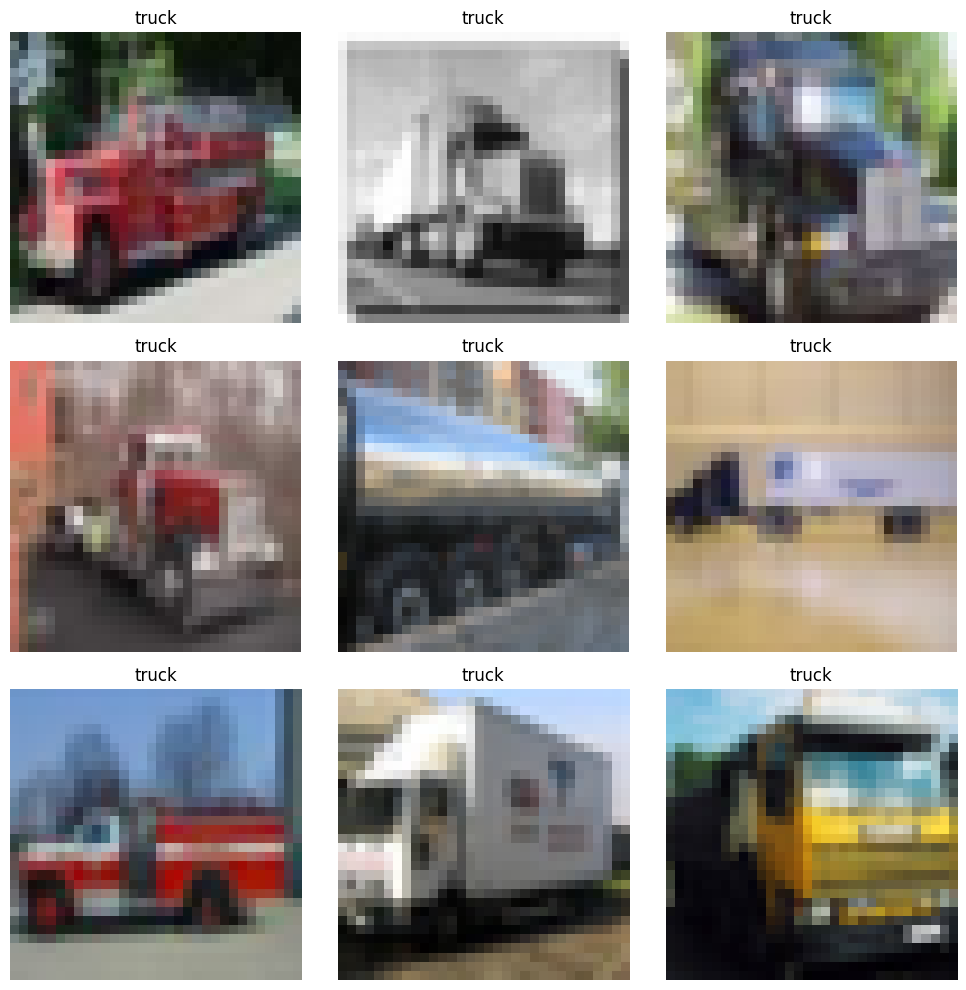

In [24]:
# Function to plot a grid of images
def plot_images(images, labels, class_names):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(9):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(class_names[labels[i]])
    plt.tight_layout()
    plt.show()

# Plot sample images from each class
samples_per_class = 9
num_classes = len(label_names)
for i, class_name in enumerate(label_names):
    class_indices = np.where(train_labels == i)[0]
    random_indices = np.random.choice(class_indices, samples_per_class, replace=False)
    sample_images = train_data[random_indices]
    sample_labels = train_labels[random_indices]
    plot_images(sample_images, sample_labels, label_names)



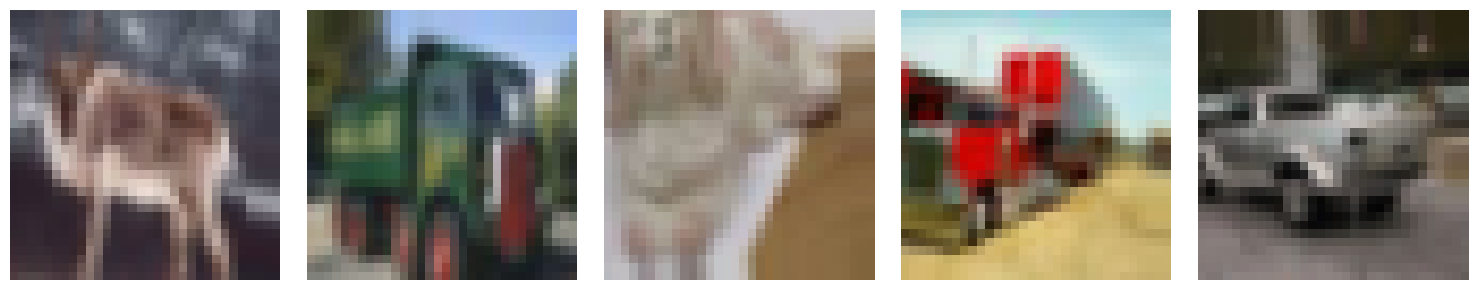

In [ ]:
# Visualize augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    augmented_images, image_labels = next(augmented_data_generator)
    axes[i].imshow(augmented_images[0])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

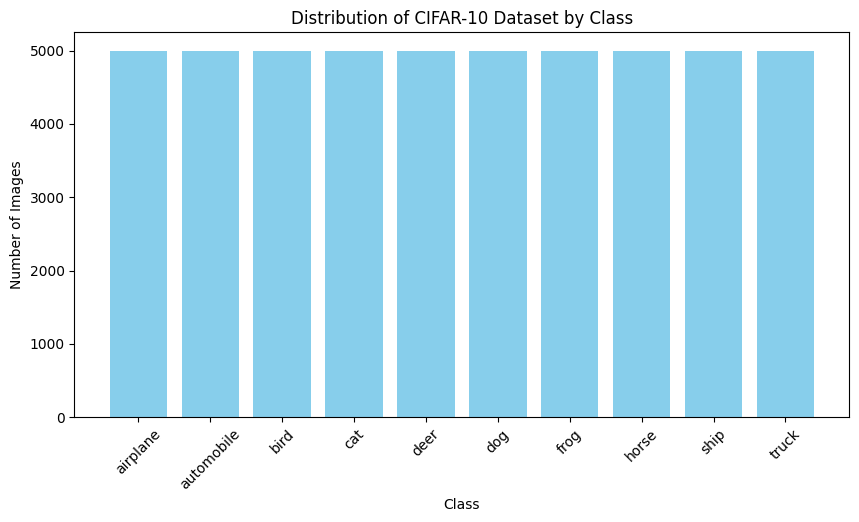

In [ ]:
# Count the number of images in each class
class_counts = np.bincount(train_labels)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the distribution of the data by class
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of CIFAR-10 Dataset by Class')
plt.xticks(rotation=45)
plt.show()


## Part 3: Model Building

In [ ]:
# Build the model architecture
cnn = tf.keras.models.Sequential()

# Step 1: Convolutional Layer with ReLU activation function and Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 2: Convolutional Layer with ReLU activation function and Pooling
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3: Convolutional Layer with ReLU activation function and Pooling
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 4: Flattening the pooled feature map
cnn.add(tf.keras.layers.Flatten())

# Step 5: Full Connection Layer (1 Hidden Layer)
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

# Step 6: Output Layer
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

## Part 4: Model Training

In [ ]:
cnn_history = cnn.fit(x=augmented_data_generator,validation_data=(test_data, test_labels),epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 97ms/step - accuracy: 0.3649 - loss: 1.8147 - val_accuracy: 0.4974 - val_loss: 1.3771
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 95ms/step - accuracy: 0.5338 - loss: 1.3028 - val_accuracy: 0.5399 - val_loss: 1.3506
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.5871 - loss: 1.1707 - val_accuracy: 0.4992 - val_loss: 1.5774
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 157s 100ms/step - accuracy: 0.6243 - loss: 1.0748 - val_accuracy: 0.5576 - val_loss: 1.3918
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 95ms/step - accuracy: 0.6493 - loss: 1.0055 - val_accuracy: 0.6853 - val_loss: 0.8913
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 97ms/step - accuracy: 0.6697 - loss: 0.9544 - val_accuracy: 0.6407 - val_loss: 1.0408
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 94ms/step - accuracy: 0.6792 - loss: 0.9237 - val_accuracy: 0.6707 - val_loss: 1.0261
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.6874 - l

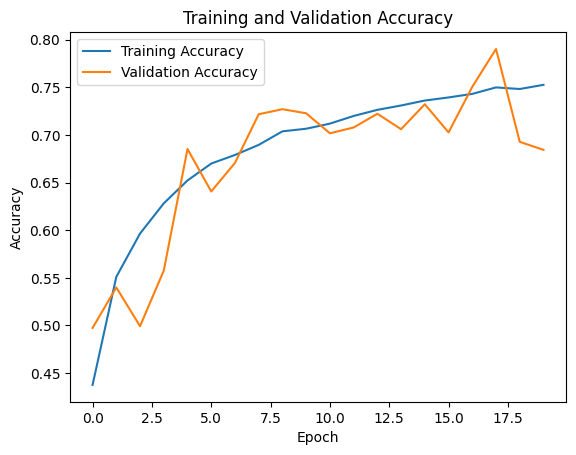

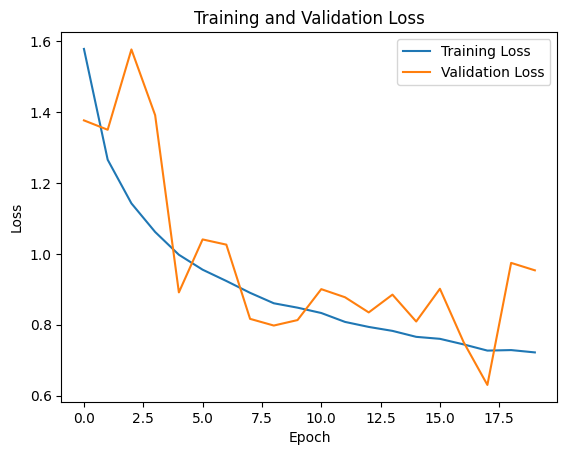

In [ ]:
# Plot training and validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 5: Model Evaluation - First Model

In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = cnn.evaluate(train_data, train_labels)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(test_data, test_labels)

# Print the training and test loss and accuracy
print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7100 - loss: 0.8442
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6822 - loss: 0.9586
Train Loss: 0.8512003421783447, Train Accuracy: 0.7071800231933594
Test Loss: 0.9535765051841736, Test Accuracy: 0.6844000220298767


This model exhibited an unstable training process, particularly evident in the test dataset's loss function results, which may be attributed to a high learning rate affecting its convergence. Nonetheless, the model still shows potential for improvement after 20 epochs of training, displaying a relatively steep learning curve. Increasing the number of convolutional layers and their filters could be a beneficial approach to extract more information from the images and enhance the overall model performance. Additionally, since the images are in a 32x32 format, having three pooling layers might result in the loss of important information.

In [13]:
# Build the model architecture
cnn1 = tf.keras.models.Sequential()

# Step 1: Convolutional Layer with ReLU activation function and Pooling
cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[32, 32, 3]))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation='relu', input_shape=[32, 32, 3]))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 2: Convolutional Layer with ReLU activation function and Pooling
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation='relu'))
cnn1.add(tf.keras.layers.BatchNormalization())
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 4: Convolutional Layer with ReLU activation function
cnn1.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn1.add(tf.keras.layers.BatchNormalization())
#cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 5: Flattening the pooled feature map
cnn1.add(tf.keras.layers.Flatten())

# Step 6: Full Connection Layer (1 Hidden Layer)
cnn1.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn1.add(tf.keras.layers.Dropout(0.3))

# Step 7: Output Layer
cnn1.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compile the model with an initial learning rate
cnn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Print the model summary
cnn1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        102464    
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                        

In [14]:
# Define the callbacks (Early-Stopping and Reduce Learning Rate)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

# Fit the model with callbacks
cnn1_history = cnn1.fit(
    x=augmented_data_generator,
    validation_data=(test_data, test_labels),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
1563/1563 [==============================] - 53s 29ms/step - loss: 1.5978 - accuracy: 0.4310 - val_loss: 1.3040 - val_accuracy: 0.5444 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1582 - accuracy: 0.5926 - val_loss: 1.0176 - val_accuracy: 0.6524 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9903 - accuracy: 0.6555 - val_loss: 1.1246 - val_accuracy: 0.6289 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9007 - accuracy: 0.6887 - val_loss: 0.8224 - val_accuracy: 0.7159 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8250 - accuracy: 0.7171 - val_loss: 0.7384 - val_accuracy: 0.7525 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7767 - accuracy: 0.7350 - val_loss: 0.8315 - val_accuracy: 0.7173 - lr: 0.0010
Epoch 7/50
1561/1563 [========================

In [15]:
# Save the model as a pickle file
with open('/content/drive/MyDrive/DL/Assignment_5/cnn1.pkl', 'wb') as f:
    pickle.dump(cnn1, f)


In [21]:
# Save the model as a h5 file
save_model(cnn1, '/content/drive/MyDrive/DL/Assignment_5/cnn1.h5')

<ipython-input-21-7232dd1c0e56>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(cnn1, '/content/drive/MyDrive/DL/Assignment_5/cnn1.h5')


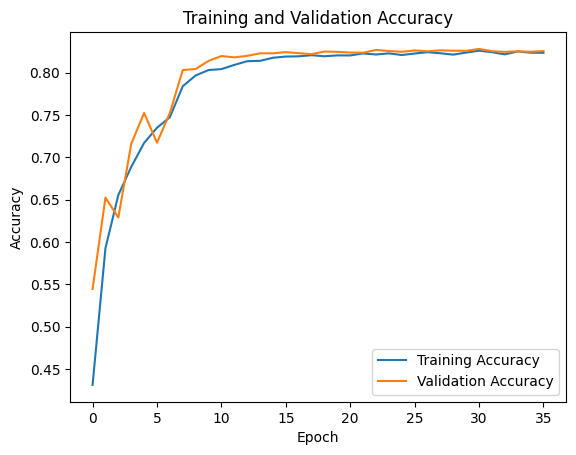

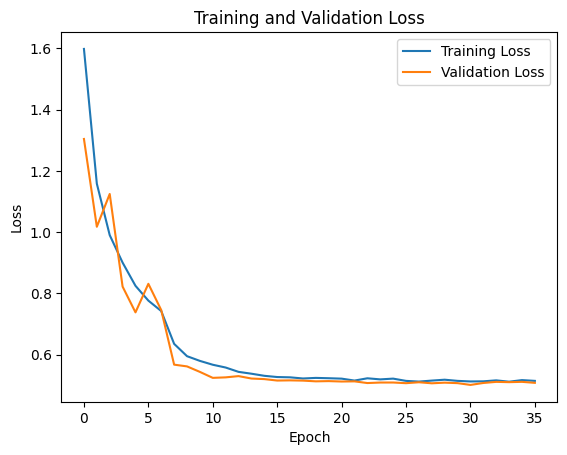

In [16]:
# Plot training and validation accuracy
plt.plot(cnn1_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn1_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#accuracy_plot_path = os.path.join(save_dir, 'accuracy_plot.png')
plt.savefig('/content/drive/MyDrive/DL/Assignment_5/cnn1_accuracy.png')  # Save the plot as an image file
plt.show()

# Plot training and validation loss
plt.plot(cnn1_history.history['loss'], label='Training Loss')
plt.plot(cnn1_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/DL/Assignment_5/cnn1_loss.png')
plt.show()

In [22]:
# Evaluate the model on the training set
train_loss, train_accuracy = cnn1.evaluate(train_data, train_labels)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn1.evaluate(test_data, test_labels)

# Print the training and test loss and accuracy
print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.8282
Train Loss: 0.37319082021713257, Train Accuracy: 0.8689600229263306
Test Loss: 0.5016502737998962, Test Accuracy: 0.8281999826431274


After applying the considered modifications, which included adding more convolutional layers, reducing the number of pooling layers, and increasing the number of filters, the model's accuracy improved significantly from 68.4% to 82.8%. The learning curve became smoother than before, likely due to the implementation of an adaptable or non-static learning rate.

There are no significant overfitting issues, likely thanks to the inclusion of Dropout and Batch Normalization layers.

313/313 [==============================] - 2s 6ms/step
Class cat - Accuracy: 0.629
Class dog - Accuracy: 0.684
Class bird - Accuracy: 0.725
Class deer - Accuracy: 0.814
Class airplane - Accuracy: 0.842
Class horse - Accuracy: 0.877
Class ship - Accuracy: 0.907
Class truck - Accuracy: 0.922
Class automobile - Accuracy: 0.934
Class frog - Accuracy: 0.948


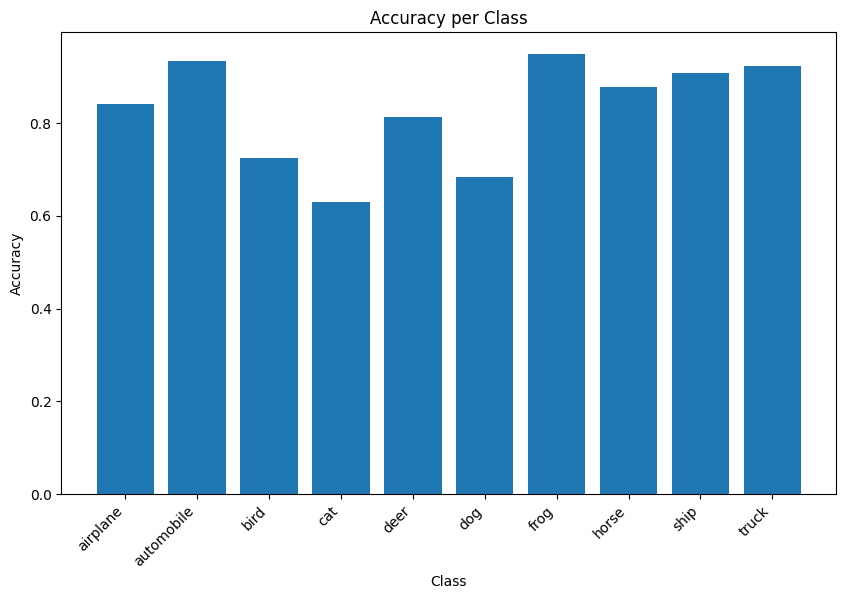

In [39]:
# Model accuracy per category

# Make predictions on the test set
predictions = cnn1.predict(test_data)

# Calculate accuracy per class
class_accuracy = {}
for i in range(num_classes):
    class_indices = np.where(test_labels == i)[0]
    class_predictions = np.argmax(predictions[class_indices], axis=1)
    class_true_labels = test_labels[class_indices]
    correct_predictions = np.sum(class_predictions == class_true_labels)
    total_examples = len(class_indices)
    class_accuracy[i] = correct_predictions / total_examples

# Sort classes by accuracy
sorted_classes = sorted(class_accuracy.items(), key=lambda x: x[1])

# Print accuracy per class
for class_index, accuracy in sorted_classes:
    print(f"Class {label_names[class_index]} - Accuracy: {accuracy}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(range(num_classes), [class_accuracy[i] for i in range(num_classes)], tick_label=label_names)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.xticks(rotation=45, ha='right')
plt.show()


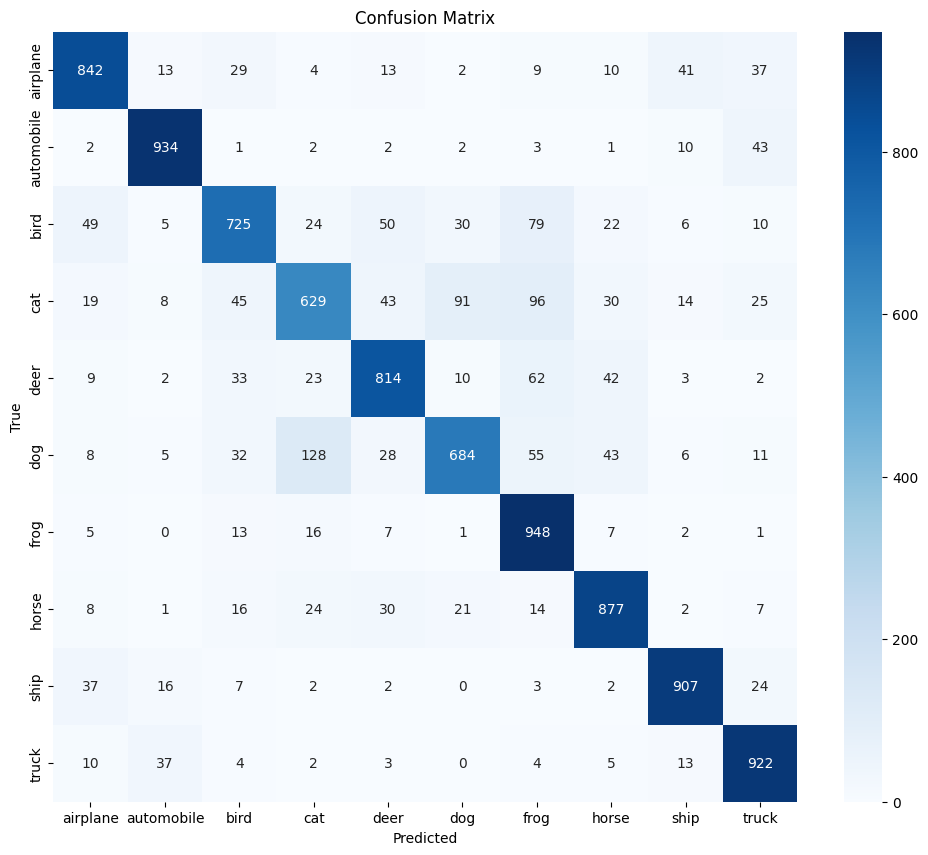

In [40]:
# Get the predicted labels for the test set
predicted_labels = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The model presents a good overall performance, as can be seen in the previous confusion matrix. However, there are some classes in which the model performs better than others.

- Class cat - Accuracy: 0.629
- Class dog - Accuracy: 0.684
- Class bird - Accuracy: 0.725
- Class deer - Accuracy: 0.814
- Class airplane - Accuracy: 0.842
- Class horse - Accuracy: 0.877
- Class ship - Accuracy: 0.907
- Class truck - Accuracy: 0.922
- Class automobile - Accuracy: 0.934
- Class frog - Accuracy: 0.948

These results indicate that the model is particularly adept at distinguishing between certain classes, such as frogs and automobiles, while it struggles more with classes like cats and dogs.

1/1 [==============================] - 0s 163ms/step


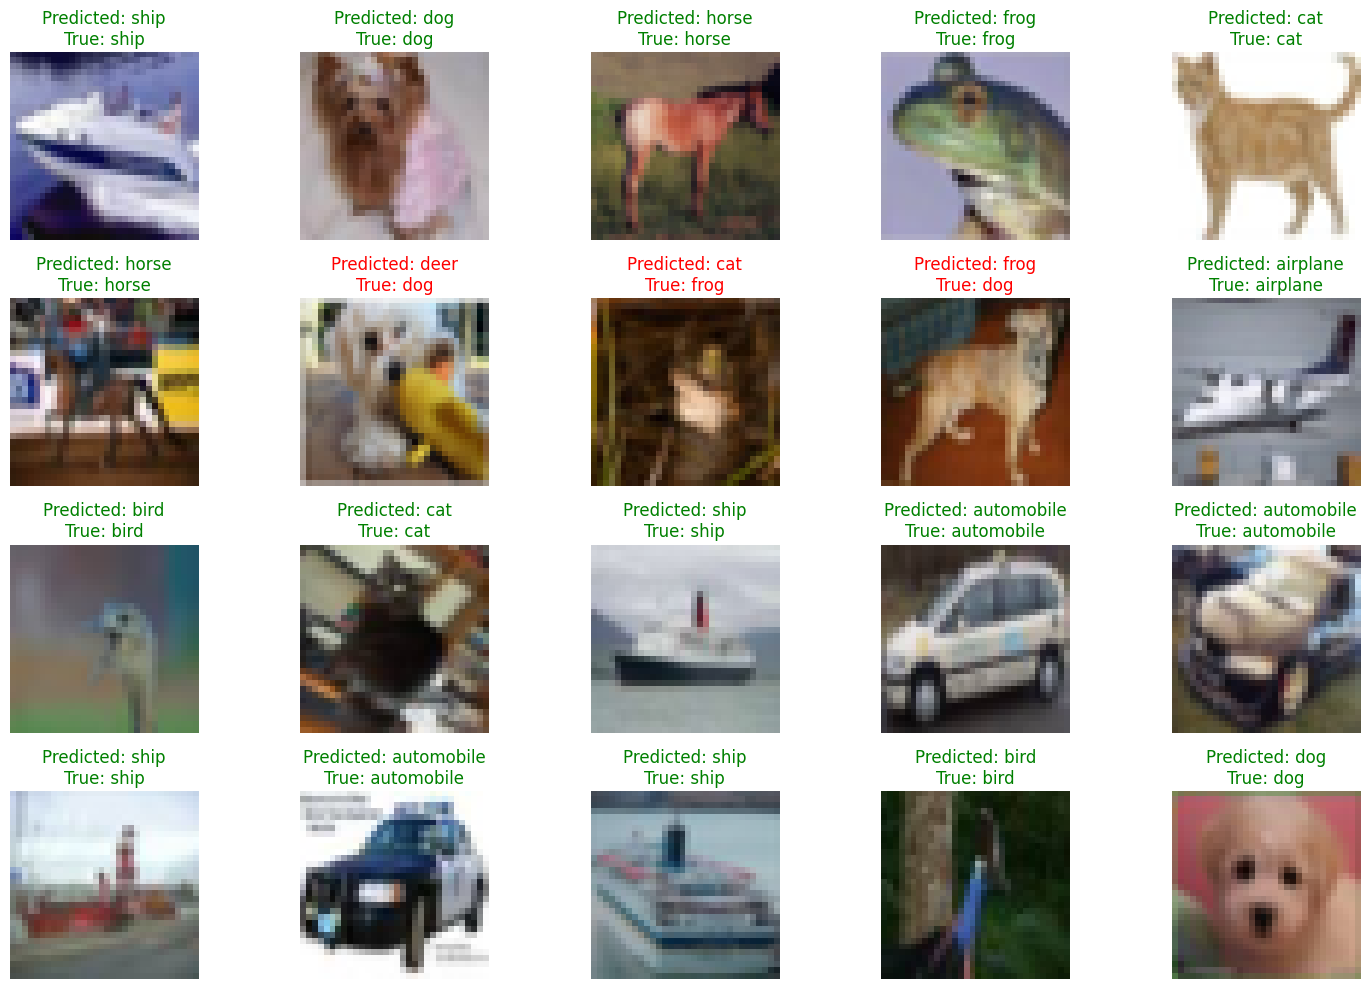

In [35]:
# Model Predictions

# Select 20 random indices
random_indices = np.random.choice(len(test_data), size=20, replace=False)

# Predict labels for the selected images
predictions = cnn1.predict(test_data[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

# Display the images along with their predicted and true labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_data[idx])
    plt.axis('off')
    if predicted_labels[i] == test_labels[idx]:
        color = 'green'
    else:
        color = 'red'
    plt.title(f"Predicted: {label_names[predicted_labels[i]]}\nTrue: {label_names[test_labels[idx]]}", color=color)
plt.tight_layout()
plt.show()

## Conclusions

1. The developed convolutional neural network (CNN) model achieved an overall test accuracy of 82.8% on the CIFAR-10 dataset. This indicates that the model is effective in classifying images into the ten predefined classes.

2. The modifications made to the model, including adding more convolutional layers, reducing the number of pooling layers, and increasing the number of filters, led to a significant improvement in accuracy from 68.4% to 82.8%. This demonstrates the importance of tuning the model architecture for better performance.

3. The model showed varying performance across different classes, with the highest accuracy achieved for frogs (94.8%) and the lowest for cats (62.9%). This indicates that the model may need further tuning or additional data augmentation for certain classes to improve performance.

4. There are no strong indications of overfitting, likely due to the implementation of Dropout and Batch Normalization layers. These regularization techniques help prevent the model from memorizing the training data and improve its generalization to unseen data.

5. Further improvements could be made by fine-tuning the model hyperparameters, exploring different architectures, or implementing more advanced techniques. Additionally, data augmentation techniques could be applied to improve the model's performance on classes with lower accuracy.